For disconnected graphs

Import Libraries

In [1]:
# Importing required libraries
import networkx as nx
import numpy as np
import itertools

Create Test Graph

In [2]:
# Creating a test graph
def create_test_graph():
  G = nx.Graph()
  G.add_nodes_from(['x','y','z','1','2','3','a','b','c','d','e','f'])
  G.add_edges_from([('x','1'),('y','1'),('z','1'),('1','2'),('2','3'),('3','a'),('3','d'),('a','b'),('b','c'),('d','e'),('e','f')])
  nx.draw(G,with_labels=1)
  return G

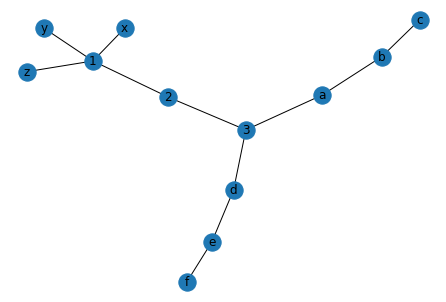

In [3]:
Gt = create_test_graph()

**Brute-force algorithm**

Algorithm:

1. Create a graph of N nodes and its edges or take an inbuilt graph like a barbell graph.
2. Now take two lists as FirstCommunity and SecondCommunity.
3. Now start putting nodes into communities like put 1st node in FirstCommunity and rest N-1 nodes to SecondCommunity and check its inter and intra edges.
4. Now we will make combinations using itertools.
5. Repeat steps 3 and 4 for every combination.
6. Now check which division is best by taking the ratio of intra/number of inter-community edges.
7. Now find the value of FirstCommunity and SecondCommunity with maximum ratio and print that value.

Exception:
If two or more division have same maximum ratio
8. Extract all the divisions with maximum ratio.
9. Print the division with minimum difference between FirstCommunity and SecondCommunity.

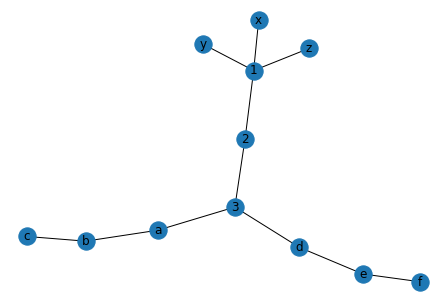

In [4]:
g = create_test_graph()

In [5]:
# uncomment the below line to run brute force algo on florentine families dataset
#g = nx.florentine_families_graph()

In [6]:
# list all nodes
nodes = g.nodes() 
print(nodes)
n = g.number_of_nodes()
print(n)

['x', 'y', 'z', '1', '2', '3', 'a', 'b', 'c', 'd', 'e', 'f']
12


In [7]:
# create first community using itertools
first_community = [] 
    
for i in range(1, n//2 + 1): 
  c = [list(a) for a in itertools.combinations(nodes, i)] 
  first_community.extend(c)
print(first_community)

[['x'], ['y'], ['z'], ['1'], ['2'], ['3'], ['a'], ['b'], ['c'], ['d'], ['e'], ['f'], ['x', 'y'], ['x', 'z'], ['x', '1'], ['x', '2'], ['x', '3'], ['x', 'a'], ['x', 'b'], ['x', 'c'], ['x', 'd'], ['x', 'e'], ['x', 'f'], ['y', 'z'], ['y', '1'], ['y', '2'], ['y', '3'], ['y', 'a'], ['y', 'b'], ['y', 'c'], ['y', 'd'], ['y', 'e'], ['y', 'f'], ['z', '1'], ['z', '2'], ['z', '3'], ['z', 'a'], ['z', 'b'], ['z', 'c'], ['z', 'd'], ['z', 'e'], ['z', 'f'], ['1', '2'], ['1', '3'], ['1', 'a'], ['1', 'b'], ['1', 'c'], ['1', 'd'], ['1', 'e'], ['1', 'f'], ['2', '3'], ['2', 'a'], ['2', 'b'], ['2', 'c'], ['2', 'd'], ['2', 'e'], ['2', 'f'], ['3', 'a'], ['3', 'b'], ['3', 'c'], ['3', 'd'], ['3', 'e'], ['3', 'f'], ['a', 'b'], ['a', 'c'], ['a', 'd'], ['a', 'e'], ['a', 'f'], ['b', 'c'], ['b', 'd'], ['b', 'e'], ['b', 'f'], ['c', 'd'], ['c', 'e'], ['c', 'f'], ['d', 'e'], ['d', 'f'], ['e', 'f'], ['x', 'y', 'z'], ['x', 'y', '1'], ['x', 'y', '2'], ['x', 'y', '3'], ['x', 'y', 'a'], ['x', 'y', 'b'], ['x', 'y', 'c'], ['x'

In [8]:
# creating second community using first community
second_community = [] 
  
for i in range(len(first_community)): 
  b = list(set(nodes)-set(first_community[i])) 
  second_community.append(b)
print(second_community)

[['y', '2', '3', 'd', 'z', 'f', '1', 'a', 'b', 'c', 'e'], ['2', '3', 'd', 'z', 'f', '1', 'a', 'b', 'c', 'e', 'x'], ['y', '2', '3', 'd', 'f', '1', 'a', 'b', 'c', 'e', 'x'], ['y', '2', '3', 'd', 'z', 'f', 'a', 'b', 'c', 'e', 'x'], ['y', '3', 'd', 'z', 'f', '1', 'a', 'b', 'c', 'e', 'x'], ['y', '2', 'd', 'z', 'f', '1', 'a', 'b', 'c', 'e', 'x'], ['y', '2', '3', 'd', 'z', 'f', '1', 'b', 'c', 'e', 'x'], ['y', '2', '3', 'd', 'z', 'f', '1', 'a', 'c', 'e', 'x'], ['y', '2', '3', 'd', 'z', 'f', '1', 'a', 'b', 'e', 'x'], ['y', '2', '3', 'z', 'f', '1', 'a', 'b', 'c', 'e', 'x'], ['y', '2', '3', 'd', 'z', 'f', '1', 'a', 'b', 'c', 'x'], ['y', '2', '3', 'd', 'z', '1', 'a', 'b', 'c', 'e', 'x'], ['2', '3', 'd', 'z', 'f', '1', 'a', 'b', 'c', 'e'], ['y', '2', '3', 'd', 'f', '1', 'a', 'b', 'c', 'e'], ['y', '2', '3', 'd', 'z', 'f', 'a', 'b', 'c', 'e'], ['y', '3', 'd', 'z', 'f', '1', 'a', 'b', 'c', 'e'], ['y', '2', 'd', 'z', 'f', '1', 'a', 'b', 'c', 'e'], ['y', '2', '3', 'd', 'z', 'f', '1', 'b', 'c', 'e'], ['y

In [9]:
# calculate intra edges for first community
intra_edges1 = []
for i in range(len(first_community)): 
  intra_edges1.append(g.subgraph(first_community[i]).number_of_edges())
print(intra_edges1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 

In [10]:
# calculate intra edges for second community
intra_edges2 = []
for i in range(len(second_community)): 
  intra_edges2.append(g.subgraph(second_community[i]).number_of_edges())
print(intra_edges2)

[10, 10, 10, 7, 9, 8, 9, 9, 10, 9, 9, 10, 9, 9, 7, 8, 7, 8, 8, 9, 8, 8, 9, 9, 7, 8, 7, 8, 8, 9, 8, 8, 9, 7, 8, 7, 8, 8, 9, 8, 8, 9, 6, 4, 5, 5, 6, 5, 5, 6, 7, 7, 7, 8, 7, 7, 8, 7, 6, 7, 7, 6, 7, 8, 8, 7, 7, 8, 9, 7, 7, 8, 8, 8, 9, 8, 8, 9, 8, 7, 7, 6, 7, 7, 8, 7, 7, 8, 7, 7, 6, 7, 7, 8, 7, 7, 8, 6, 4, 5, 5, 6, 5, 5, 6, 6, 6, 6, 7, 6, 6, 7, 6, 5, 6, 6, 5, 6, 7, 7, 6, 6, 7, 8, 6, 6, 7, 7, 7, 8, 7, 7, 8, 7, 7, 6, 7, 7, 8, 7, 7, 8, 6, 4, 5, 5, 6, 5, 5, 6, 6, 6, 6, 7, 6, 6, 7, 6, 5, 6, 6, 5, 6, 7, 7, 6, 6, 7, 8, 6, 6, 7, 7, 7, 8, 7, 7, 8, 6, 4, 5, 5, 6, 5, 5, 6, 6, 6, 6, 7, 6, 6, 7, 6, 5, 6, 6, 5, 6, 7, 7, 6, 6, 7, 8, 6, 6, 7, 7, 7, 8, 7, 7, 8, 4, 4, 4, 5, 4, 4, 5, 3, 2, 3, 3, 2, 3, 4, 4, 3, 3, 4, 5, 3, 3, 4, 4, 4, 5, 4, 4, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 5, 6, 6, 5, 4, 5, 6, 5, 6, 6, 6, 6, 8, 6, 6, 7, 6, 6, 7, 6, 6, 7, 7, 7, 8, 6, 6, 7, 7, 7, 8, 8, 7, 6, 5, 6, 6, 7, 6, 6, 7, 6, 4, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 4, 5, 5, 4, 5, 6, 6, 5, 5

In [11]:
# calculate inter edges between both communities
e = g.number_of_edges() 
inter_edges = []  
for i in range(len(first_community)): 
  inter_edges.append(e-intra_edges1[i]-intra_edges2[i])
print(inter_edges) 

[1, 1, 1, 4, 2, 3, 2, 2, 1, 2, 2, 1, 2, 2, 3, 3, 4, 3, 3, 2, 3, 3, 2, 2, 3, 3, 4, 3, 3, 2, 3, 3, 2, 3, 3, 4, 3, 3, 2, 3, 3, 2, 4, 7, 6, 6, 5, 6, 6, 5, 3, 4, 4, 3, 4, 4, 3, 3, 5, 4, 3, 5, 4, 2, 3, 4, 4, 3, 1, 4, 4, 3, 3, 3, 2, 2, 3, 1, 3, 2, 4, 5, 4, 4, 3, 4, 4, 3, 2, 4, 5, 4, 4, 3, 4, 4, 3, 3, 6, 5, 5, 4, 5, 5, 4, 4, 5, 5, 4, 5, 5, 4, 4, 6, 5, 4, 6, 5, 3, 4, 5, 5, 4, 2, 5, 5, 4, 4, 4, 3, 3, 4, 2, 2, 4, 5, 4, 4, 3, 4, 4, 3, 3, 6, 5, 5, 4, 5, 5, 4, 4, 5, 5, 4, 5, 5, 4, 4, 6, 5, 4, 6, 5, 3, 4, 5, 5, 4, 2, 5, 5, 4, 4, 4, 3, 3, 4, 2, 3, 6, 5, 5, 4, 5, 5, 4, 4, 5, 5, 4, 5, 5, 4, 4, 6, 5, 4, 6, 5, 3, 4, 5, 5, 4, 2, 5, 5, 4, 4, 4, 3, 3, 4, 2, 5, 6, 6, 5, 6, 6, 5, 7, 9, 8, 7, 9, 8, 6, 7, 8, 8, 7, 5, 8, 8, 7, 7, 7, 6, 6, 7, 5, 3, 5, 4, 3, 5, 4, 4, 5, 6, 6, 5, 3, 6, 6, 5, 5, 5, 4, 4, 5, 3, 3, 4, 3, 5, 4, 4, 5, 7, 6, 4, 6, 5, 3, 4, 4, 1, 4, 4, 3, 5, 5, 4, 4, 5, 3, 3, 3, 2, 4, 5, 3, 3, 4, 2, 1, 1, 5, 6, 5, 5, 4, 5, 5, 4, 2, 5, 4, 4, 3, 4, 4, 3, 5, 6, 6, 5, 6, 6, 5, 5, 7, 6, 5, 7, 6, 4, 5, 6, 6, 5, 

In [12]:
# calculate ratio
ratio = []
for i in range(len(first_community)): 
  ratio.append((float(intra_edges1[i]+intra_edges2[i]))/inter_edges[i]) 
print(ratio)

[10.0, 10.0, 10.0, 1.75, 4.5, 2.6666666666666665, 4.5, 4.5, 10.0, 4.5, 4.5, 10.0, 4.5, 4.5, 2.6666666666666665, 2.6666666666666665, 1.75, 2.6666666666666665, 2.6666666666666665, 4.5, 2.6666666666666665, 2.6666666666666665, 4.5, 4.5, 2.6666666666666665, 2.6666666666666665, 1.75, 2.6666666666666665, 2.6666666666666665, 4.5, 2.6666666666666665, 2.6666666666666665, 4.5, 2.6666666666666665, 2.6666666666666665, 1.75, 2.6666666666666665, 2.6666666666666665, 4.5, 2.6666666666666665, 2.6666666666666665, 4.5, 1.75, 0.5714285714285714, 0.8333333333333334, 0.8333333333333334, 1.2, 0.8333333333333334, 0.8333333333333334, 1.2, 2.6666666666666665, 1.75, 1.75, 2.6666666666666665, 1.75, 1.75, 2.6666666666666665, 2.6666666666666665, 1.2, 1.75, 2.6666666666666665, 1.2, 1.75, 4.5, 2.6666666666666665, 1.75, 1.75, 2.6666666666666665, 10.0, 1.75, 1.75, 2.6666666666666665, 2.6666666666666665, 2.6666666666666665, 4.5, 4.5, 2.6666666666666665, 10.0, 2.6666666666666665, 4.5, 1.75, 1.2, 1.75, 1.75, 2.666666666666

In [13]:
# find out maximum ratio
maxV=max(ratio)
print(maxV)

10.0


In [14]:
# find out the number of division with maximum ratio
max_ratio = []
for i in range(len(ratio)):
  if ratio[i]==maxV:
    max_ratio.append(i)
print(len(max_ratio))
print(max_ratio)

11
[0, 1, 2, 8, 11, 68, 77, 278, 297, 298, 793]


In [15]:
# checking number of nodes in first community of divisions with maximum ratio
key_list = []
for i in max_ratio:
  key_list.append(len(first_community[i]))
print(key_list)

[1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 5]


In [16]:
# calculating difference between 
key_list = np.asarray(key_list)
idx = (np.abs(key_list - n/2)).argmin()

In [17]:
# print the result
print('[ ', first_community[max_ratio[idx]], ' ] , [ ', second_community[max_ratio[idx]], ' ]')

[  ['x', 'y', 'z', '1', '2']  ] , [  ['3', 'd', 'f', 'b', 'c', 'e', 'a']  ]


In [18]:
""" To implement changes in graph remove all the inter edges of above division """

' To implement changes in graph remove all the inter edges of above division '

**Girvan Newman Algorithm**

Algorithm:

1. Create a graph of N nodes and its edges or take an inbuilt graph like a barbell graph.
2. Calculate the betweenness of all existed edges in the graph.
3. Now remove all the edge(s) with the highest betweenness.
4. Now recalculate the betweenness of all the edges that got affected by the    removal of edges.
5. Now repeat steps 3 and 4 until no edges remain.

In [19]:
# Implementing girvan newman algorithm
def girvan_newman(G):
  while(len(list(nx.connected_components(G)))==1):
    d1 = nx.edge_betweenness_centrality(G)       # Step 2
    key_ = max(d1,key=d1.get)
    u,v = key_
    G.remove_edge(u, v)                          # Step 3
  nx.draw(G,with_labels=1) 

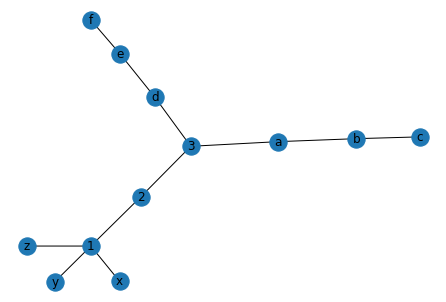

In [20]:
Gt = create_test_graph()                         # Step 1

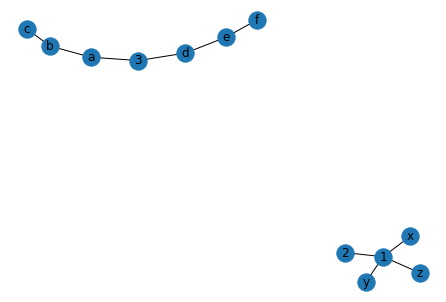

In [21]:
girvan_newman(Gt)

Testing on barbell graph

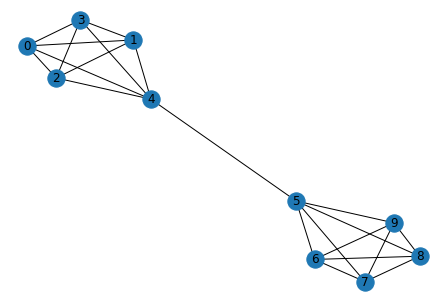

In [22]:
Gb = nx.barbell_graph(5,0)
nx.draw(Gb,with_labels=1)

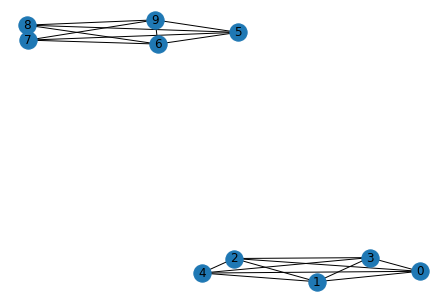

In [23]:
girvan_newman(Gb)

Testing on karate club graph

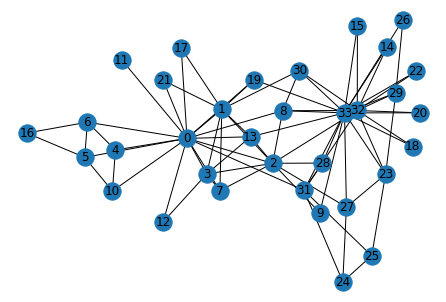

In [24]:
g1 = nx.karate_club_graph()
nx.draw(g1,with_labels=1)

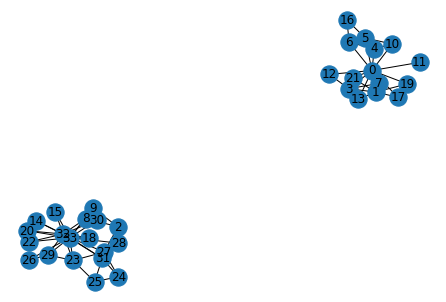

In [25]:
girvan_newman(g1)

Testing on Davis Southern Women network

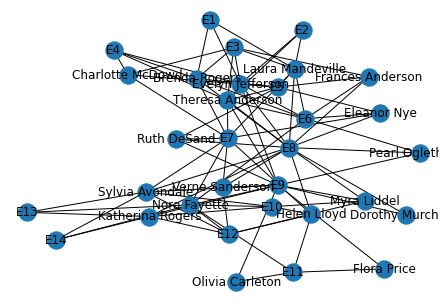

In [26]:
dsw = nx.davis_southern_women_graph()
nx.draw(dsw,with_labels=1)

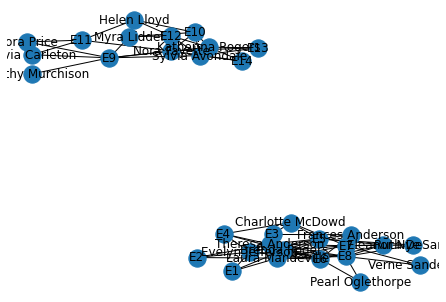

In [27]:
girvan_newman(dsw)

Testing on folrentine families network

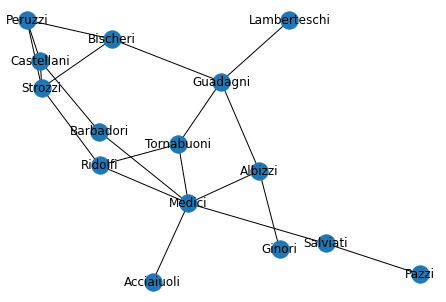

In [28]:
ffn = nx.florentine_families_graph()
nx.draw(ffn,with_labels=1)

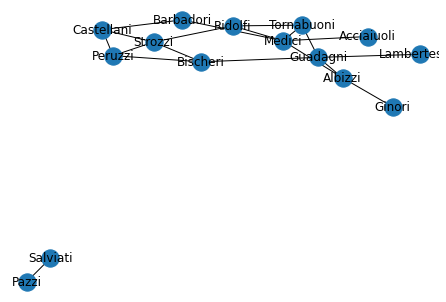

In [29]:
girvan_newman(ffn)

Testing on les miserables network

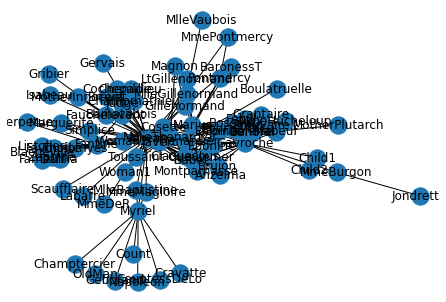

In [30]:
lmg = nx.les_miserables_graph()
nx.draw(lmg,with_labels=1)

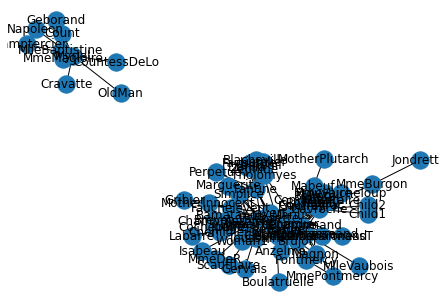

In [31]:
girvan_newman(lmg)

Testing on Complete graph

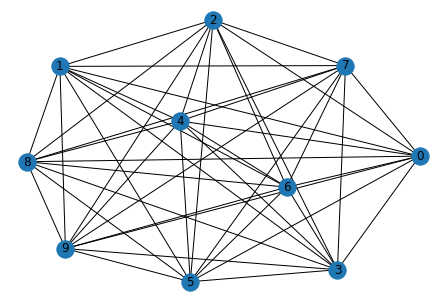

In [32]:
Gc = nx.complete_graph(10)
nx.draw(Gc,with_labels=1)

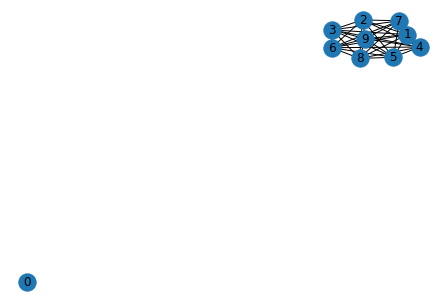

In [33]:
girvan_newman(Gc)